# <center> SCC.413 Applied Data Mining 
# <center> **Sentiment Analysis of IMDB Movie Reviews**
Classifying the sentiments of reviews about different movies into Positive and Negative using different classification models.

# Data Information:
* IMDB Movie review dataset consisting of 50,000 movie reviews. 
* It has two columns- Review and Sentiment

In [1]:
# Importing nltk from carrying out operations on text
import nltk

# download stopwords models
nltk.download('stopwords')

# download wordnet model
nltk.download('wordnet')

# download tokeniser models
nltk.download('punkt')

# installing emot from carrying out operations on text emojis and emoticons
!pip install emot

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 61 kB 18 kB/s 


In [2]:
# Importing other required libraries
import pandas as pd
import numpy as np
# Libraries for Tokenization
from nltk.tokenize import word_tokenize, regexp_tokenize, sent_tokenize
# Library to calculate the frequency of tokens 
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
# Libraries for Stemming
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
# Library for Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Importing strings for punctuations
import string
# Importing regular expression
import re
# libraries foir emojis and emoticons conversion
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
# For splitting the data into train and test
from sklearn.model_selection import train_test_split
# Libraries for converting text into numbers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Libraries for modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
# Libraries for accuracy measurements
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Plotting library
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

In [3]:
# Path of data in Google Drive
data_path = "/content/drive/MyDrive/NLP Assignment/IMDB Dataset/IMDB Dataset.csv"

In [4]:
# Reading of reviews csv file into dataframe
df = pd.read_csv(data_path)
# Displaying top 5 rows of the dataframe
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Exploration

In [5]:
# Shape of the dataframe
df.shape

(50000, 2)

From above we can see it has 50,000 rows and 2 columns-(review and sentiment)

In [6]:
# Checking the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


There are no null values in any of the columns

In [7]:
# Checking the distribution of the sentiment column
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

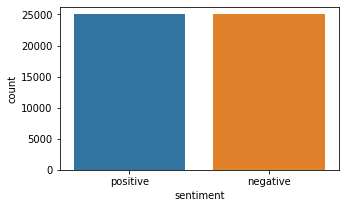

In [8]:
# Looking at the distribution of reviews sentiments
plt.figure(figsize=(5,3))
sns.countplot(x='sentiment',data=df)

There are equal number of positive and negative sentiments. Also, when did head() we found that data is randomly distributed.

In [9]:
# Creating copy of dataframe df 
df1 = df.copy()
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Creating a column containing count of words in a text to see the relation between counts fo words in a review and its sentiment
df1['Num_word_review'] = df1['review'].apply(lambda x:len(str(x).split())) #Number Of words in a review
df1.head()

,review,sentiment,Num_word_review
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [11]:
# Average length of review
print("The Average length of reviews is: ", np.mean(df1['Num_word_review']))

The Average length of reviews is:  231.15694


Text(0, 0.5, 'Frequency of Reviews')

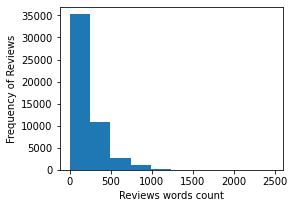

In [12]:
plt.figure(figsize=(4,3))
plt.hist(df1['Num_word_review'])
plt.xlabel("Reviews words count")
plt.ylabel("Frequency of Reviews")

In [13]:
# Counting number of reviews in both the sentiments having word count less than 250
print("Number of Positive reviews having word count less than 250 are: ", sum(df1[df1.sentiment == 'positive']['Num_word_review'] < 250))
print("Number of Negative reviews having word count less than 250 are: ", sum(df1[df1.sentiment == 'negative']['Num_word_review'] < 250))

Number of Positive reviews having word count less than 250 are:  17518
Number of Negative reviews having word count less than 250 are:  17607


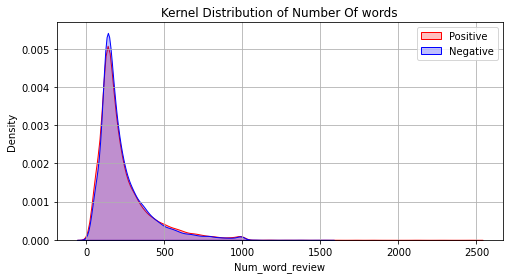

In [14]:
# Plotting KDE plot for both the negative and positive sentiments
plt.figure(figsize=(8,4))
p1=sns.kdeplot(df1[df1.sentiment == 'positive']['Num_word_review'], shade=True, color="r", label="Positive").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(df1[df1.sentiment == 'negative']['Num_word_review'], shade=True, color="b", label="Negative")
plt.grid()
plt.legend()

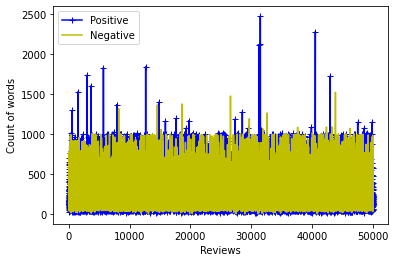

In [15]:
plt.plot(df1[df1.sentiment == 'positive']['Num_word_review'], marker='+', c='b', label='Positive')
plt.plot(df1[df1.sentiment == 'negative']['Num_word_review'], c='y', label = 'Negative')
plt.xlabel("Reviews")
plt.ylabel("Count of words")
plt.legend()

In [16]:
# Counting number of reviews in both the sentiments having word count more than 1000
print("Number of Positive reviews having word count more than 1000 are: ", sum(df1[df1.sentiment == 'positive']['Num_word_review'] > 1000))
print("Number of Negative reviews having word count more than 1000 are: ", sum(df1[df1.sentiment == 'negative']['Num_word_review'] > 1000))

Number of Positive reviews having word count more than 1000 are:  49
Number of Negative reviews having word count more than 1000 are:  33


We can see that the density of positive and negative reviews having word count between 1 to 1000 is almost same with a slightly higher number in case of Negative reviews, and very few reviews are there from both the sentiments to have word count more than 1000. Also, approximately 17000 out of 25000 of each sentiment reviews are of length less than or equal to the average length which is 231.

# Text Pre-Processing

In [17]:
# Making aan object for WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

**Things we would be dealing when pre-processing the reviews:**


* Removal of HTML tags (like in row-2)
* Replacement of URLs with '[URL]'
* Replacement of hashtags with '[Hashtag]'
* Replacement of word starting with '@' with '[Mention]'
* Handling emojis and emoticons
* Removal of Stopwords
* Tokenization
* Removal of punctuations
* POS tagging
* Converting reviews into lowercase
* Stemming and Lemmatization
* Converting pos-tag column to only contains pos_tags







### Step-1: Removal of HTML tags

In [18]:
# For HTML tags
htmltag_re = re.compile(r'<.*?>')
df1['reviews_preprocessed'] = df1['review'].apply(lambda x: htmltag_re.sub(" ", x))
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love in the Time of Money"" is..."


### Step-2: Replacement of hashtags

In [19]:
hashtag_re = re.compile(r"#\w+")
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(lambda x: hashtag_re.sub("[Hashtag]", x))
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love in the Time of Money"" is..."


### Step-3: Replacement of URL's

In [20]:
# For URLs
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(lambda x: url_re.sub("[URL]", x))
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love in the Time of Money"" is..."


### Step-4: Replacement of mentioning

In [21]:
mention_re = re.compile(r"@\w+")
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(lambda x: mention_re.sub("[Mention]", x))
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. The filming t...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love in the Time of Money"" is..."


### Step-5: Handling of emojis and emoticons by converting them into text

In [22]:
def convert_emojis(text):
    for emoji in UNICODE_EMOJI:
      if emoji in text:
        text = text.replace(emoji, "_".join(UNICODE_EMOJI[emoji].replace(",","").replace(":","").split()))
    return text# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
      if emot in text:
        text = text.replace(emot, "_".join(EMOTICONS_EMO[emot].replace(",","").split()))
    return text

In [23]:
# Passing both functions to 'text_rare'
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(convert_emoticons)
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(convert_emojis)

# removal of multi-space
multispace_re = re.compile(r'\s+')
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(lambda x: multispace_re.sub(" ", x))

df1['reviews_preprocessed'].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: reviews_preprocessed, dtype: object

In [24]:
df1.iloc[0, 2]

307

### Step-6: Removal of Stopwords
Stopwords like 'i', 'me', 'my', 'myself', 'we', etc. are low information words and if considered would lead to increase in the number of features of less relevance. So, we will remove them from our text 

In [25]:
# Stopwords present in English Language
stop_words = stopwords.words('english')
# Stopwords contains 'no', 'nor', 'not' which is favourable towards negative comments so would be removing from stop_words list
words_to_remove_from_stop_words = ['no', 'nor', 'not']
for word in words_to_remove_from_stop_words:
  stop_words.remove(word)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [26]:
# Function to remove the stopwords
def stopwords_func(text):
  # Breaking of text into words
  tokens = str(text).split()
  temp = []
  for word in tokens:
    if len(word) > 1 and word.lower() not in stop_words:
      temp.append(word)    
  return " ".join(temp)

In [27]:
df1['reviews_preprocessed'] = df1['reviews_preprocessed'].apply(stopwords_func)
df1['reviews_preprocessed'].head()

0    One reviewers mentioned watching Oz episode ho...
1    wonderful little production. filming technique...
2    thought wonderful way spend time hot summer we...
3    Basically there's family little boy (Jake) thi...
4    Petter Mattei's "Love Time Money" visually stu...
Name: reviews_preprocessed, dtype: object

In [28]:
df1.iloc[0, 2]

307

### Step-7: Tokenization using custom tokenizer

In [29]:
# Custom tokenizer that considers [Hashtags], [URL], [Mentions], emoji's name, words and other non-space characters
tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)")
def custom_tokenise(text):
    return tokenise_re.findall(text)

In [30]:
df1['processed_tokens'] = df1['reviews_preprocessed'].apply(custom_tokenise)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[One, reviewers, mentioned, watching, Oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, ., filming, te..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[Basically, there's, family, little, boy, (, J..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[Petter, Mattei's, "", Love, Time, Money, "", vi..."


### Step-8: Removal of Punctuations


In [31]:
# Fetching punctuations from string library
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
# Function to remove punctuations from a token list
def punc_removal(token_list):
  temp = []
  for token in token_list:
    if len(token) < 1:
      pass
    elif token not in punctuations:
      temp.append(token)
  return temp

In [33]:
df1['processed_tokens'] = df1['processed_tokens'].apply(punc_removal)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[One, reviewers, mentioned, watching, Oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[Basically, there's, family, little, boy, Jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[Petter, Mattei's, Love, Time, Money, visually..."


### Step-9: Creation of Parts-of-Speech(POS) tagging

In [34]:
# Resource for using pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [35]:
# Function that would create pos_tag of all the tokens in a token list
def POS_create(token_list):
  return nltk.pos_tag(token_list)

In [36]:
# Creating a new column named pos_tag that would contain all the pos tagging correspondong to the token list
df1['pos_tag'] = df1['processed_tokens'].apply(POS_create)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[One, reviewers, mentioned, watching, Oz, epis...","[(One, CD), (reviewers, NNS), (mentioned, VBD)..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[Basically, there's, family, little, boy, Jake...","[(Basically, RB), (there's, JJ), (family, NN),..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[Petter, Mattei's, Love, Time, Money, visually...","[(Petter, NNP), (Mattei's, NNP), (Love, NNP), ..."


### Step-10: Converting processed reviews into lowercase
The itention of converting all the words into lowercase is to treat all the words having same spelling but in different cases are treated equally.

In [37]:
def convert_lowercase(token_list):
  temp = [token.lower() for token in token_list]
  return temp

In [38]:
# Creating a new column 'reviews_preprocessed' containing reviews into lower case
df1['processed_tokens'] = df1['processed_tokens'].apply(convert_lowercase)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis...","[(One, CD), (reviewers, NNS), (mentioned, VBD)..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[basically, there's, family, little, boy, jake...","[(Basically, RB), (there's, JJ), (family, NN),..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[petter, mattei's, love, time, money, visually...","[(Petter, NNP), (Mattei's, NNP), (Love, NNP), ..."


### Step-11: Applying Stemming over processed tokens

In [39]:
def stemming_func(token_list):
  snow = SnowballStemmer('english')
  temp = [snow.stem(token) for token in token_list]
  return temp

In [40]:
# Creating a new column named 'stems' that would contain all the pos tagging correspondong to the token list
df1['stems'] = df1['processed_tokens'].apply(stemming_func)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag,stems
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[basically, there's, family, little, boy, jake...","[(Basically, RB), (there's, JJ), (family, NN),...","[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[petter, mattei's, love, time, money, visually...","[(Petter, NNP), (Mattei's, NNP), (Love, NNP), ...","[petter, mattei, love, time, money, visual, st..."


### Step-12: Applying Lemmatization over processed tokens

In [41]:
def lemma_func(token_list):
  wnl = WordNetLemmatizer()
  temp = [wnl.lemmatize(token) for token in token_list]
  return temp

In [42]:
# Creating a new column named 'lems' that would contain all the pos tagging correspondong to the token list
df1['lems'] = df1['processed_tokens'].apply(lemma_func)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag,stems,lems
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis...","[(One, CD), (reviewers, NNS), (mentioned, VBD)...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[basically, there's, family, little, boy, jake...","[(Basically, RB), (there's, JJ), (family, NN),...","[basic, there, famili, littl, boy, jake, think...","[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[petter, mattei's, love, time, money, visually...","[(Petter, NNP), (Mattei's, NNP), (Love, NNP), ...","[petter, mattei, love, time, money, visual, st...","[petter, mattei's, love, time, money, visually..."


### Step-13: Converting pos-tag column to only contains pos_tags

In [43]:
# Creating a distinct_postags list that will contain distinct pos tags
def postag_func(pos_tag):
  temp = []
  for i in pos_tag:
    temp.append(i[1])
  return temp

In [44]:
# Applying postag_func function to only keep the pos_tags corresponding to all words in a corpus
df1['pos_tag'] = df1['pos_tag'].apply(postag_func)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag,stems,lems
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis...","[CD, NNS, VBD, VBG, NNP, NN, VBD, RB, RB, VBD,...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[JJ, JJ, NN, VBG, JJ, JJ, JJ, NN, VBZ, VBG, RB...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[VBN, JJ, NN, JJ, NN, JJ, NN, NN, VBG, NN, VBN...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...,"[basically, there's, family, little, boy, jake...","[RB, JJ, NN, JJ, JJ, NNP, VBZ, JJ, NN, NN, NNS...","[basic, there, famili, littl, boy, jake, think...","[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu...","[petter, mattei's, love, time, money, visually...","[NNP, NNP, NNP, NNP, NNP, RB, VBG, NN, NN, NNP...","[petter, mattei, love, time, money, visual, st...","[petter, mattei's, love, time, money, visually..."


# Conversion of Target column into numerical
Here 'sentiment' is the target column and we are converting positive to 1 and negative to 0

In [45]:
df1['sentiment'].replace({'positive': 1, 'negative': 0}, inplace=True)
df1.head()

,review,sentiment,Num_word_review,reviews_preprocessed,processed_tokens,pos_tag,stems,lems
0,One of the other reviewers has mentioned that ...,1,307,One reviewers mentioned watching Oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis...","[CD, NNS, VBD, VBG, NNP, NN, VBD, RB, RB, VBD,...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production. filming technique...,"[wonderful, little, production, filming, techn...","[JJ, JJ, NN, VBG, JJ, JJ, JJ, NN, VBZ, VBG, RB...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[VBN, JJ, NN, JJ, NN, JJ, NN, NN, VBG, NN, VBN...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,138,Basically there's family little boy (Jake) thi...,"[basically, there's, family, little, boy, jake...","[RB, JJ, NN, JJ, JJ, NNP, VBZ, JJ, NN, NN, NNS...","[basic, there, famili, littl, boy, jake, think...","[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,"Petter Mattei's ""Love Time Money"" visually stu...","[petter, mattei's, love, time, money, visually...","[NNP, NNP, NNP, NNP, NNP, RB, VBG, NN, NN, NNP...","[petter, mattei, love, time, money, visual, st...","[petter, mattei's, love, time, money, visually..."


In [46]:
# Function to find the unique words across both the sentiments
def func_unique_words(sentiment_token_series):
  temp = []
  for i in sentiment_token_series:
    temp += i
  return temp

In [47]:
positive_sentiments = df1[df1.sentiment == 1]['lems']
negative_sentiments = df1[df1.sentiment == 0]['lems']
# list of unique tokens in positive and negative sentiments
positive_tokens_list = func_unique_words(positive_sentiments)
negative_tokens_list = func_unique_words(negative_sentiments)
# Set of unique tokens in positive and negative sentiments
positive_tokens_set = set(func_unique_words(positive_sentiments))
negative_tokens_set = set(func_unique_words(negative_sentiments))

In [48]:
print("Number of unique words in positive sentiment reviews are: ", len(positive_tokens_set))
print("Number of unique words in negative sentiment reviews are: ", len(negative_tokens_set))

Number of unique words in positive sentiment reviews are:  101486
Number of unique words in negative sentiment reviews are:  98815


In [49]:
# Tokens common to both positive and negative sentiments
common_words = positive_tokens_set.intersection(negative_tokens_set)
print("Number of tokens common to both the positive and negative sentiment reviews are", len(common_words))
print("Tokens common to both the sentiments are: ", common_words)

Number of tokens common to both the positive and negative sentiment reviews are 50688
Tokens common to both the sentiments are:  {"'teen'", 'f-16s', 'moses', 'podunk', 'mainland', 'pavarotti', 'flint', 'receded', '2happy_face_smiley7', '1million', 'voss', 'refrained', 'take-charge', 'fie', 'obsessively', 'rusting', 'wellbeing', 'professional', 'walkin', "skies'", 'wielding', 'darkhorse', 'rotary', 'grossed', 'bookie', 'manila', 'vented', 'poignant', 'rougher', 'excited', 'accented', 'williams', 'intruded', 'go', 'cynthia', 'graft', 'rapturous', 'intimidating', "waxman's", 'saturn', 'irresponsible', 'savage', 'unfocused', 'homophobic', 'patriot', 'tenny', 'jest', 'justification', 'executed', 'censorship', 'drywall', 'diced', 'awarding', 'stare', 'fifteen', 'everyman', "duran's", 'fuel', 'vagabond', 'subside', 'reshoots', "faye's", "sybil's", 'dreamgirls', 'thirty-two', 'maslin', 'write-off', 'freeman', 'insinuation', 'miri', 'epic', 'hustle', 'thorough', 'hornet', 'toot', 'bag', 'crudel

In [50]:
# Splitting of data into train and test
X = df1['lems']
Y = df1['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=6)

# Shape of train and test
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((35000,), (35000,)), ((15000,), (15000,)))

For CountVectorizer and TFiDF we needs a text instead of tokens so we'll first convert all our tokens into text

In [51]:
# joining tokens using " " to form a text to be passed 
x_train = x_train.apply(lambda x: " ".join(x))
x_test = x_test.apply(lambda x: " ".join(x))

# Feature Extraction

## Count Vectorizer

In [52]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=2,max_df=0.5,binary=False,ngram_range=(1,3), max_features = 1000)
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (35000, 1000)
BOW_cv_test: (15000, 1000)


In [53]:
# Words and their position in the bag of words in a sorted fasion
words_position = sorted(cv.vocabulary_.items(), key=lambda kv: kv[1])
# Rearranging the word and its position
words_position = [(j,i) for (i,j) in words_position]
# Frequency of occurance of every word in the bag of words
words_frequency = cv_train_reviews.toarray().sum(axis=0)
# Creating dictionary with key as word and value as its frequency
word_freq = {words_position[i][1]:words_frequency[i] for i in range(len(words_position))}
# Sorting the word_freq dictionary on the basis on value in a descending order
word_freq = dict(sorted(word_freq.items(), key=lambda kv: kv[1], reverse=True))
word_freq

{'like': 28693,
 'time': 22142,
 'good': 20741,
 'character': 19794,
 'it': 18463,
 'story': 17702,
 'no': 17670,
 'would': 17393,
 'even': 17356,
 'get': 17237,
 'make': 16997,
 'see': 16793,
 'really': 16132,
 'well': 15023,
 'scene': 14898,
 'much': 13588,
 'bad': 12868,
 'people': 12837,
 'great': 12730,
 'also': 12493,
 'first': 12137,
 'way': 12058,
 'show': 12055,
 'thing': 11477,
 'made': 11330,
 'life': 11010,
 'could': 10909,
 'think': 10637,
 'go': 10392,
 'know': 9944,
 'watch': 9836,
 'love': 9790,
 'plot': 9528,
 'two': 9441,
 'many': 9431,
 'actor': 9362,
 'year': 9313,
 'seen': 9303,
 'that': 9302,
 'the': 9252,
 'never': 9207,
 'say': 9058,
 'end': 9043,
 'acting': 9008,
 'look': 8852,
 'best': 8753,
 'little': 8506,
 'ever': 8375,
 'man': 8363,
 'better': 7979,
 'take': 7778,
 'work': 7718,
 'come': 7680,
 'still': 7603,
 'part': 7170,
 'something': 7078,
 'director': 6970,
 'find': 6947,
 'give': 6937,
 'want': 6924,
 'back': 6802,
 'lot': 6747,
 'there': 6703,
 'rea

### Zipfian Curve for Bag of Words for top-50 tokens

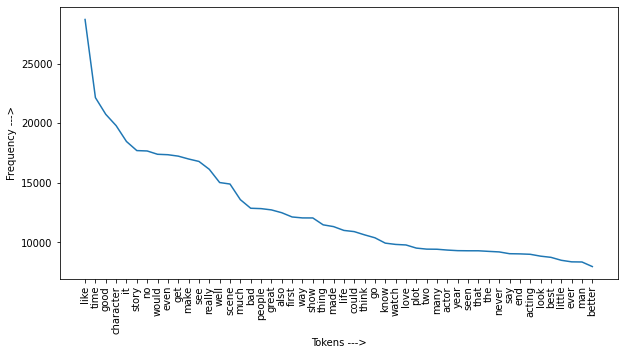

In [54]:
# Forming the Zipfian Curve to see the tokens and their frequency
plt.figure(figsize=(10,5))
plt.plot(list(word_freq.keys())[:50], list(word_freq.values())[:50])
plt.xticks(rotation=90)
plt.xlabel("Tokens --->")
plt.ylabel("Frequency --->")
plt.show()

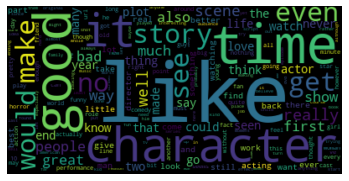

In [55]:
from wordcloud import WordCloud

def create_wordcloud(words):
    wordcloud = WordCloud().generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

create_wordcloud(word_freq)

## Tf-Idf vectorizer

In [56]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=2,max_df=0.5,use_idf=True, ngram_range=(1,3), max_features = 1000)
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (35000, 1000)
Tfidf_test: (15000, 1000)


# Modelling

## Logistic Regression

### Fitting

In [57]:
#training the model
#lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr = LogisticRegression()
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()
LogisticRegression()


### Prediction

In [58]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


### Accuracy Calculation

In [59]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8496666666666667
lr_tfidf_score : 0.861


### Classification report

In [60]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.81      0.84      7536
    Negative       0.82      0.89      0.85      7464

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

              precision    recall  f1-score   support

    Positive       0.87      0.85      0.86      7536
    Negative       0.85      0.88      0.86      7464

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



### Confusion Matrix

In [61]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[6618  846]
 [1409 6127]]
[[6540  924]
 [1161 6375]]


## SGD

In [62]:
train_sentiments = y_train
test_sentiments = y_test

### Fitting

In [63]:
#training the linear svm
svm=SGDClassifier()
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier()
SGDClassifier()


### Prediction

In [64]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


### Accuracy Calculation

In [65]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8495333333333334
svm_tfidf_score : 0.8595333333333334


### Classification report

In [66]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.81      0.84      7536
    Negative       0.82      0.89      0.85      7464

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

              precision    recall  f1-score   support

    Positive       0.88      0.84      0.86      7536
    Negative       0.84      0.88      0.86      7464

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



### Confusion Matrix

In [67]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[6648  816]
 [1441 6095]]
[[6578  886]
 [1221 6315]]


## Naive Bayes

### Fitting

In [68]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


### Prediction

In [69]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 1 1 ... 1 0 0]
[0 1 1 ... 1 0 0]


### Accuracy Calculation

In [70]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8383333333333334
mnb_tfidf_score : 0.8356


### Classification report

In [71]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.83      0.84      7536
    Negative       0.83      0.85      0.84      7464

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000

              precision    recall  f1-score   support

    Positive       0.85      0.82      0.83      7536
    Negative       0.82      0.86      0.84      7464

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



### Confusion Matrix

In [72]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[6340 1124]
 [1301 6235]]
[[6386 1078]
 [1388 6148]]


# Combined modelling across all the tokened columns 

In [73]:
# Columns containing different types of tokens
different_tokens_cols = ['processed_tokens', 'pos_tag', 'stems', 'lems']

# Lists to store across all models corresponding to bag of words and Tf-Idf
# For logistic refression
LR_bow = []
LR_tf = []
# For SGD
SGD_bow = []
SGD_tf = []
# For Naive Bayes
NB_bow = []
NB_tf = []


for col in different_tokens_cols:
  X = df1[col]
  Y = df1['sentiment']
  # Splitting of data into train and test using train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=6)

  # joining tokens using " " to form a text to be passed 
  x_train = x_train.apply(lambda x: " ".join(x))
  x_test = x_test.apply(lambda x: " ".join(x))

  # Count Vectorizer
  #Count vectorizer for bag of words
  cv=CountVectorizer(min_df=2,max_df=0.5, binary=False, ngram_range=(1,3), max_features = 20000)
  #transformed train reviews
  cv_train_reviews=cv.fit_transform(x_train)
  #transformed test reviews
  cv_test_reviews=cv.transform(x_test)

  # Tf-Idf
  #Tfidf vectorizer
  tv=TfidfVectorizer(min_df=2, max_df=0.5, use_idf=True, ngram_range=(1,3), max_features = 20000)
  #transformed train reviews
  tv_train_reviews=tv.fit_transform(x_train)
  #transformed test reviews
  tv_test_reviews=tv.transform(x_test)

  # Modelling
  ##################################################################
  # Logistic Regression
  lr = LogisticRegression()
  #Fitting the model for Bag of words
  lr_bow = lr.fit(cv_train_reviews,y_train)
  #Fitting the model for tfidf features
  lr_tfidf = lr.fit(tv_train_reviews,y_train)
  # ---------------------------------------------------------------
  #Predicting the model for bag of words
  lr_bow_predict = lr.predict(cv_test_reviews)
  ##Predicting the model for tfidf features
  lr_tfidf_predict = lr.predict(tv_test_reviews)
  # ---------------------------------------------------------------
  #Accuracy score for bag of words
  lr_bow_score = accuracy_score(y_test,lr_bow_predict)
  #Accuracy score for tfidf features
  lr_tfidf_score = accuracy_score(y_test,lr_tfidf_predict)

  LR_bow.append(lr_bow_score)
  LR_tf.append(lr_tfidf_score)

  ##################################################################
  # SGD
  train_sentiments = y_train
  test_sentiments = y_test
  # -------------------------------------------------------------
  # training the linear svm
  svm = SGDClassifier()
  # fitting the svm for bag of words
  svm_bow = svm.fit(cv_train_reviews,train_sentiments)
  # fitting the svm for tfidf features
  svm_tfidf = svm.fit(tv_train_reviews,train_sentiments)
  # ------------------------------------------------------------
  # Predicting the model for bag of words
  svm_bow_predict = svm.predict(cv_test_reviews)
  # Predicting the model for tfidf features
  svm_tfidf_predict = svm.predict(tv_test_reviews)
  # ------------------------------------------------------------
  # Accuracy score for bag of words
  svm_bow_score = accuracy_score(test_sentiments,svm_bow_predict)
  # Accuracy score for tfidf features
  svm_tfidf_score = accuracy_score(test_sentiments,svm_tfidf_predict)

  SGD_bow.append(svm_bow_score)
  SGD_tf.append(svm_tfidf_score)

  ##################################################################
  # Naive Bayes
  # training the model
  mnb = MultinomialNB()
  #fitting the svm for bag of words
  mnb_bow = mnb.fit(cv_train_reviews,train_sentiments)
  #fitting the svm for tfidf features
  mnb_tfidf = mnb.fit(tv_train_reviews,train_sentiments)
  # -----------------------------------------------------------------
  #Predicting the model for bag of words
  mnb_bow_predict = mnb.predict(cv_test_reviews)
  #Predicting the model for tfidf features
  mnb_tfidf_predict = mnb.predict(tv_test_reviews)
  # ----------------------------------------------------------------
  #Accuracy score for bag of words
  mnb_bow_score = accuracy_score(test_sentiments,mnb_bow_predict)
  #Accuracy score for tfidf features
  mnb_tfidf_score = accuracy_score(test_sentiments,mnb_tfidf_predict) 

  NB_bow.append(mnb_bow_score)
  NB_tf.append(mnb_tfidf_score)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [74]:
# For logistic refression
print(LR_bow)
print(LR_tf)
# For SGD
print(SGD_bow)
print(SGD_tf)
# For Naive Bayes
print(NB_bow)
print(NB_tf)

[0.8804, 0.6348, 0.8805333333333333, 0.8803333333333333]
[0.9009333333333334, 0.6352, 0.8978666666666667, 0.8990666666666667]
[0.8840666666666667, 0.6316666666666667, 0.8811333333333333, 0.882]
[0.9010666666666667, 0.6386666666666667, 0.8965333333333333, 0.8988]
[0.8749333333333333, 0.6138666666666667, 0.8722, 0.8742666666666666]
[0.8721333333333333, 0.6202, 0.8708666666666667, 0.8723333333333333]


In [75]:
# Creation of dataframe consisting of accuracies across all the models using different token and different extraction methods
accuracy_df = pd.DataFrame()
accuracy_df['Token_type'] = different_tokens_cols

accuracy_df['Logistic Regression BOW'] = LR_bow
accuracy_df['Logistic Regression TfIdf'] = LR_tf
accuracy_df['SGD BOW'] = SGD_bow
accuracy_df['SGD TfIdf'] = SGD_tf
accuracy_df['Naive Bayes BOW'] = NB_bow
accuracy_df['Naive Bayes TfIdf'] = NB_tf

# Setting the index
accuracy_df.set_index(['Token_type'], inplace = True)

accuracy_df = accuracy_df.apply(lambda x: round(x*100))

accuracy_df

,Logistic Regression BOW,Logistic Regression TfIdf,SGD BOW,SGD TfIdf,Naive Bayes BOW,Naive Bayes TfIdf
Token_type,,,,,,
processed_tokens,88.0,90.0,88.0,90.0,87.0,87.0
pos_tag,63.0,64.0,63.0,64.0,61.0,62.0
stems,88.0,90.0,88.0,90.0,87.0,87.0
lems,88.0,90.0,88.0,90.0,87.0,87.0


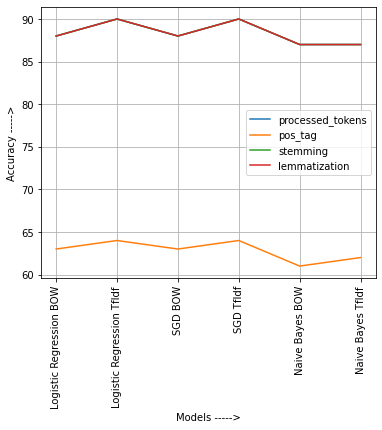

In [76]:
plt.figure(figsize=(6,5))
plt.plot(accuracy_df.iloc[0,:],  label = 'processed_tokens' )
plt.plot(accuracy_df.iloc[1,:],  label = 'pos_tag' )
plt.plot(accuracy_df.iloc[2,:],  label = 'stemming' )
plt.plot(accuracy_df.iloc[3,:],  label = 'lemmatization' )
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel("Models ----->")
plt.ylabel("Accuracy ----->")
plt.grid()

As can be seen from above that models with pos_tag tokens is showing worst result as compared to other models which are showing a good result between 80 to 90%.